In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
df = {'origin': [2008+i for i in range(10)],
     '1': [507547, 20223, 343456, 573600, 117700, 156300, 55800, 142600, 314300, 206800],
     '2': [835677, 433600, 917332, 1159200, 962400, 644700, 404200, 682400, 539700, np.nan],
     '3': [1081267, 543800, 1383200, 1581800, 1587100, 1172300, 1095500, 1314800, np.nan, np.nan],
     '4': [1174355, 1073300, 1623400, 2133200, 2226600, 1296400, 1237900, np.nan, np.nan, np.nan],
     '5': [1358755, 1380400, 1875700, 2352100, 2603300, 1589600, np.nan, np.nan, np.nan, np.nan],
     '6': [1619343, 1569300, 2224100, 2610400, 2619400, np.nan, np.nan, np.nan, np.nan, np.nan],
     '7': [1801223, 1559000, 2287600, 2709700, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     '8': [1865767, 1622800, 2347600, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     '9': [1866287, 1675700, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
     '10': [1886259, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]}

In [3]:
cl_triangle = pd.DataFrame(df)
cl_triangle.set_index(cl_triangle["origin"],inplace=True)
del cl_triangle["origin"]

In [4]:
cl_triangle

,1,2,3,4,5,6,7,8,9,10
origin,,,,,,,,,,
2008,507547,835677.0,1081267.0,1174355.0,1358755.0,1619343.0,1801223.0,1865767.0,1866287.0,1886259.0
2009,20223,433600.0,543800.0,1073300.0,1380400.0,1569300.0,1559000.0,1622800.0,1675700.0,NaN
2010,343456,917332.0,1383200.0,1623400.0,1875700.0,2224100.0,2287600.0,2347600.0,NaN,NaN
2011,573600,1159200.0,1581800.0,2133200.0,2352100.0,2610400.0,2709700.0,NaN,NaN,NaN
2012,117700,962400.0,1587100.0,2226600.0,2603300.0,2619400.0,NaN,NaN,NaN,NaN
2013,156300,644700.0,1172300.0,1296400.0,1589600.0,NaN,NaN,NaN,NaN,NaN
2014,55800,404200.0,1095500.0,1237900.0,NaN,NaN,NaN,NaN,NaN,NaN
2015,142600,682400.0,1314800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,314300,539700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


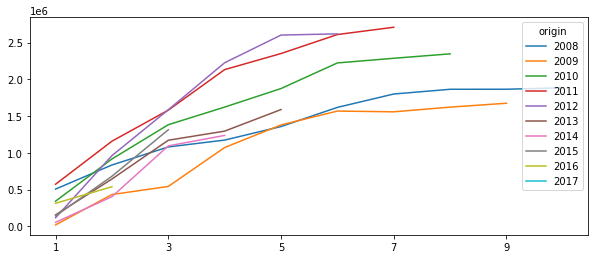

In [5]:
cl_triangle.T.plot(figsize=(10,4))
plt.show()

In [6]:
factors = []
for col in cl_triangle.columns[:-1]:
    factors.append(cl_triangle[str(int(col)+1)].sum() / cl_triangle[col][:-int(col)].sum())
factors = np.array(factors)
factors

array([2.9483004 , 1.61598683, 1.2747421 , 1.17136101, 1.11204383,
       1.04167693, 1.03334807, 1.01531288, 1.01070146])

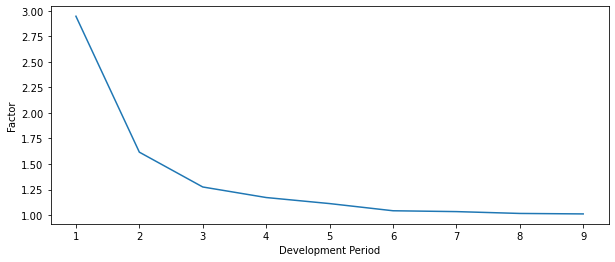

In [7]:
dev_period = np.array([(i+1) for i in range(9)])
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dev_period,factors)
ax.set_xlabel("Development Period")
ax.set_ylabel("Factor")
plt.show()

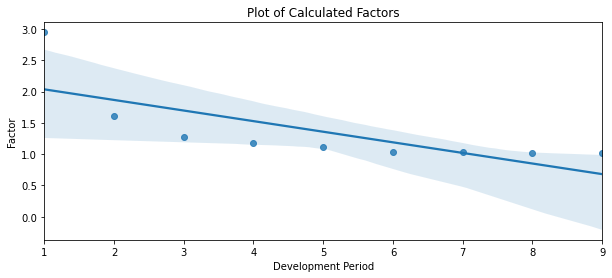

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title("Plot of Calculated Factors")
ax.set_xlabel("Development Period")
ax.set_ylabel("Factor")

sns.regplot(x=dev_period, y=factors) #regression plot
plt.show() #Not a great fit



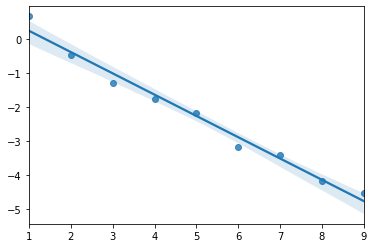

In [9]:
#So I'll try this
sns.regplot(x=dev_period,y=np.log(factors-1))
plt.show() #Better fit

In [10]:
#Now I fit a regression line to a log-transformed data
tail_model = LinearRegression().fit(dev_period.reshape(-1,1), np.log(factors-1))

In [11]:
print(f"The tail's intercept is {tail_model.intercept_}")
print(f"The tail's coefficient is {tail_model.coef_}") # i.e: the slope

The tail's intercept is 0.8657743274748828
The tail's coefficient is [-0.62554023]


In [12]:
tail = np.array([(i+10) for i in range(101)])
tail = np.exp(tail_model.intercept_ + tail_model.coef_ * tail) + 1# I'm converting it back, because previously I transformed it into a log
#+1 because I previously subtracted by 1

In [13]:
tail

array([1.00456367, 1.00244144, 1.0013061 , 1.00069873, 1.0003738 ,
       1.00019997, 1.00010698, 1.00005723, 1.00003062, 1.00001638,
       1.00000876, 1.00000469, 1.00000251, 1.00000134, 1.00000072,
       1.00000038, 1.00000021, 1.00000011, 1.00000006, 1.00000003,
       1.00000002, 1.00000001, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [14]:
tail_factor = tail.prod()
tail_factor # it would be the last one in factors(computed some cells above)

1.0098473798951049

In [15]:
for i, col in enumerate(cl_triangle.columns[1:]):
    for j in range(i+1):
        cl_triangle[col].at[2017-j] = factors[i] * cl_triangle[str(int(col)-1)].at[2017-j]
cl_triangle        

,1,2,3,4,5,6,7,8,9,10
origin,,,,,,,,,,
2008,507547,8.356770e+05,1.081267e+06,1.174355e+06,1.358755e+06,1.619343e+06,1.801223e+06,1.865767e+06,1.866287e+06,1.886259e+06
2009,20223,4.336000e+05,5.438000e+05,1.073300e+06,1.380400e+06,1.569300e+06,1.559000e+06,1.622800e+06,1.675700e+06,1.693632e+06
2010,343456,9.173320e+05,1.383200e+06,1.623400e+06,1.875700e+06,2.224100e+06,2.287600e+06,2.347600e+06,2.383549e+06,2.409056e+06
2011,573600,1.159200e+06,1.581800e+06,2.133200e+06,2.352100e+06,2.610400e+06,2.709700e+06,2.800063e+06,2.842940e+06,2.873364e+06
2012,117700,9.624000e+05,1.587100e+06,2.226600e+06,2.603300e+06,2.619400e+06,2.728569e+06,2.819561e+06,2.862737e+06,2.893372e+06
2013,156300,6.447000e+05,1.172300e+06,1.296400e+06,1.589600e+06,1.767705e+06,1.841377e+06,1.902784e+06,1.931921e+06,1.952595e+06
2014,55800,4.042000e+05,1.095500e+06,1.237900e+06,1.450028e+06,1.612494e+06,1.679698e+06,1.735713e+06,1.762292e+06,1.781151e+06
2015,142600,6.824000e+05,1.314800e+06,1.676031e+06,1.963237e+06,2.183206e+06,2.274195e+06,2.350035e+06,2.386021e+06,2.411555e+06
2016,314300,5.397000e+05,8.721481e+05,1.111764e+06,1.302277e+06,1.448189e+06,1.508545e+06,1.558852e+06,1.582723e+06,1.599660e+06


In [16]:
cl_triangle["ultimate"] = cl_triangle["10"] * tail_factor
cl_triangle

,1,2,3,4,5,6,7,8,9,10,ultimate
origin,,,,,,,,,,,
2008,507547,8.356770e+05,1.081267e+06,1.174355e+06,1.358755e+06,1.619343e+06,1.801223e+06,1.865767e+06,1.866287e+06,1.886259e+06,1.904834e+06
2009,20223,4.336000e+05,5.438000e+05,1.073300e+06,1.380400e+06,1.569300e+06,1.559000e+06,1.622800e+06,1.675700e+06,1.693632e+06,1.710310e+06
2010,343456,9.173320e+05,1.383200e+06,1.623400e+06,1.875700e+06,2.224100e+06,2.287600e+06,2.347600e+06,2.383549e+06,2.409056e+06,2.432779e+06
2011,573600,1.159200e+06,1.581800e+06,2.133200e+06,2.352100e+06,2.610400e+06,2.709700e+06,2.800063e+06,2.842940e+06,2.873364e+06,2.901659e+06
2012,117700,9.624000e+05,1.587100e+06,2.226600e+06,2.603300e+06,2.619400e+06,2.728569e+06,2.819561e+06,2.862737e+06,2.893372e+06,2.921864e+06
2013,156300,6.447000e+05,1.172300e+06,1.296400e+06,1.589600e+06,1.767705e+06,1.841377e+06,1.902784e+06,1.931921e+06,1.952595e+06,1.971823e+06
2014,55800,4.042000e+05,1.095500e+06,1.237900e+06,1.450028e+06,1.612494e+06,1.679698e+06,1.735713e+06,1.762292e+06,1.781151e+06,1.798691e+06
2015,142600,6.824000e+05,1.314800e+06,1.676031e+06,1.963237e+06,2.183206e+06,2.274195e+06,2.350035e+06,2.386021e+06,2.411555e+06,2.435302e+06
2016,314300,5.397000e+05,8.721481e+05,1.111764e+06,1.302277e+06,1.448189e+06,1.508545e+06,1.558852e+06,1.582723e+06,1.599660e+06,1.615413e+06


In [17]:
cl_triangle["IBNR"] = cl_triangle["ultimate"].subtract(cl_triangle["10"])


In [18]:
cl_triangle

,1,2,3,4,5,6,7,8,9,10,ultimate,IBNR
origin,,,,,,,,,,,,
2008,507547,8.356770e+05,1.081267e+06,1.174355e+06,1.358755e+06,1.619343e+06,1.801223e+06,1.865767e+06,1.866287e+06,1.886259e+06,1.904834e+06,18574.708954
2009,20223,4.336000e+05,5.438000e+05,1.073300e+06,1.380400e+06,1.569300e+06,1.559000e+06,1.622800e+06,1.675700e+06,1.693632e+06,1.710310e+06,16677.842043
2010,343456,9.173320e+05,1.383200e+06,1.623400e+06,1.875700e+06,2.224100e+06,2.287600e+06,2.347600e+06,2.383549e+06,2.409056e+06,2.432779e+06,23722.889290
2011,573600,1.159200e+06,1.581800e+06,2.133200e+06,2.352100e+06,2.610400e+06,2.709700e+06,2.800063e+06,2.842940e+06,2.873364e+06,2.901659e+06,28295.106016
2012,117700,9.624000e+05,1.587100e+06,2.226600e+06,2.603300e+06,2.619400e+06,2.728569e+06,2.819561e+06,2.862737e+06,2.893372e+06,2.921864e+06,28492.134440
2013,156300,6.447000e+05,1.172300e+06,1.296400e+06,1.589600e+06,1.767705e+06,1.841377e+06,1.902784e+06,1.931921e+06,1.952595e+06,1.971823e+06,19227.947145
2014,55800,4.042000e+05,1.095500e+06,1.237900e+06,1.450028e+06,1.612494e+06,1.679698e+06,1.735713e+06,1.762292e+06,1.781151e+06,1.798691e+06,17539.668904
2015,142600,6.824000e+05,1.314800e+06,1.676031e+06,1.963237e+06,2.183206e+06,2.274195e+06,2.350035e+06,2.386021e+06,2.411555e+06,2.435302e+06,23747.497678
2016,314300,5.397000e+05,8.721481e+05,1.111764e+06,1.302277e+06,1.448189e+06,1.508545e+06,1.558852e+06,1.582723e+06,1.599660e+06,1.615413e+06,15752.460287


In [19]:
cl_triangle["IBNR"].head()

origin
2008    18574.708954
2009    16677.842043
2010    23722.889290
2011    28295.106016
2012    28492.134440
Name: IBNR, dtype: float64

In [20]:
cl_triangle.sum()

1           2.438326e+06
2           7.188918e+06
3           1.161720e+07
4           1.480893e+07
5           1.734660e+07
6           1.929018e+07
7           2.009414e+07
8           2.076424e+07
9           2.108220e+07
10          2.130781e+07
ultimate    2.151763e+07
IBNR        2.098261e+05
dtype: float64